# Quantitative Methods Assignment
---

***“Why does region x have a higher rate of childhood obesity between 2008-2018 compared to the National average?”***

This notebook provides the code used to answer the above research question.

The first part of the analysis is dedicated to determining which region is region x. The second half of the analysis will explore the association between childhood obesity rates and community-funding per capita to see if this can explain why there are regional differences in childhood obesity rates.

In [1]:
import pandas as pd
import math
import scipy.stats as sps
import os 
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.3f}'.format # specifies default number format to 3 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

### Revising the dataset

I will be revising the dataset to add in columns for rates and per capita spending. Columns such as cases, gender-cases, gender populations will be dropped from the dataset since we will be exploring childhood obesity rates and per capita variables.

In [2]:
# Find working directory
path = os.getcwd()
print("The current working directory is %s" %path)

The current working directory is /home/jovyan/work/modules/qm/qm


In [3]:
# Loading data into dataframe

d1 = pd.read_csv('coursework_1_data_2019.csv')

Looking at the first 10 rows of the dataframe:

In [4]:
d1.head(10)

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority
5,Bexley,519,601,707,226554,242730,245880,210,217,266,...,133621,199000,72000,27000,14000,64000,15000,7000,London,london_borough
6,Birmingham,3207,3621,3927,1026238,1083189,1086463,838,823,870,...,617417,831000,64000,272000,130000,126000,140000,99000,West Midlands,metropolitan_borough
7,Blackburn with Darwen,831,818,962,140363,134228,142219,265,265,291,...,73807,91000,15000,16000,13000,21000,18000,8000,North West,unitary_authority
8,Blackpool,583,588,623,141571,143438,147545,190,173,196,...,73717,99000,24000,19000,9000,28000,10000,9000,North West,unitary_authority
9,Bolton,505,587,686,265521,280005,285250,225,234,288,...,146410,201000,55000,68000,11000,25000,31000,11000,North West,metropolitan_borough


Getting a list of all the columns in the data frame:

In [5]:
print(list(d1.columns.values))

['local_authority_area', '2008_cases_total', '2013_cases_total', '2018_cases_total', '2008_pop_total', '2013_pop_total', '2018_pop_total', '2008_cases_male', '2013_cases_male', '2018_cases_male', '2008_pop_male', '2013_pop_male', '2018_pop_male', '2008_cases_female', '2013_cases_female', '2018_cases_female', '2008_pop_female', '2013_pop_female', '2018_pop_female', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling', 'region', 'local_authority_type']


Getting the information about the data:

In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

Next we want to add some new columns to the data frame using the existing columns. This will convert some of the data to become more representative and comparable for the incoming analysis:

Adding the rate / 100,000 for each year in the dataset and getting a 10 year average:

In [7]:
## Adding columns for rate of childhood obesity per 100,000 for each record
## Adding the 10 year average rate of childhood obesity

d1['rate_2008'] = (d1['2008_cases_total'] / d1['2008_pop_total'] * 100000)
d1['rate_2013'] = (d1['2013_cases_total'] / d1['2013_pop_total'] * 100000)
d1['rate_2018'] = (d1['2018_cases_total'] / d1['2018_pop_total'] * 100000)
d1['10_year_avg_rate'] = ((d1['rate_2008'] + d1['rate_2013'] + d1['rate_2018']) / 3)

Adding columns for total funding per capita and for each sub-category for each year, also 10-year averages added:

In [8]:
## Adding columns for total funding per capita and the 10-year average spend

d1['funding_pc_2008'] = (d1['total_budget'] / d1['2008_pop_total'])
d1['funding_pc_2013'] = (d1['total_budget'] / d1['2013_pop_total'])
d1['funding_pc_2018'] = (d1['total_budget'] / d1['2018_pop_total'])
d1['funding_pc_10_yr'] = ((d1['funding_pc_2008'] + d1['funding_pc_2013'] + d1['funding_pc_2018']) / 3)

In [9]:
## Adding columns for clean air funding per capita and the 10-year average spend

d1['clean_air_pc_2008'] = (d1['clean_air'] / d1['2008_pop_total'])
d1['clean_air_pc_2013'] = (d1['clean_air'] / d1['2013_pop_total'])
d1['clean_air_pc_2018'] = (d1['clean_air'] / d1['2018_pop_total'])
d1['clean_air_pc_10_yr'] = ((d1['clean_air_pc_2008'] + d1['clean_air_pc_2013'] + d1['clean_air_pc_2018']) / 3)

In [10]:
## Adding columns for clean environment funding per capita and the 10-year average spend

d1['clean_env_pc_2008'] = (d1['clean_environ'] / d1['2008_pop_total'])
d1['clean_env_pc_2013'] = (d1['clean_environ'] / d1['2013_pop_total'])
d1['clean_env_pc_2018'] = (d1['clean_environ'] / d1['2018_pop_total'])
d1['clean_env_pc_10_yr'] = ((d1['clean_env_pc_2008'] + d1['clean_env_pc_2013'] + d1['clean_env_pc_2018']) / 3)

In [11]:
## Adding columns for health training funding per capita and 10-year average spend

d1['health_pc_2008'] = (d1['health_training'] / d1['2008_pop_total'])
d1['health_pc_2013'] = (d1['health_training'] / d1['2013_pop_total'])
d1['health_pc_2018'] = (d1['health_training'] / d1['2018_pop_total'])
d1['health_pc_10_yr'] = ((d1['health_pc_2008'] + d1['health_pc_2013'] + d1['health_pc_2018']) / 3)

In [12]:
## Adding columns for school awareness funding per capita

d1['school_pc_2008'] = (d1['school_awareness'] / d1['2008_pop_total'])
d1['school_pc_2013'] = (d1['school_awareness'] / d1['2013_pop_total'])
d1['school_pc_2018'] = (d1['school_awareness'] / d1['2018_pop_total'])
d1['school_pc_10_yr'] = ((d1['school_pc_2008'] + d1['school_pc_2013'] + d1['school_pc_2018']) / 3)

In [13]:
## Adding columns for media awareness funding per capita

d1['media_pc_2008'] = (d1['media_awareness'] / d1['2008_pop_total'])
d1['media_pc_2013'] = (d1['media_awareness'] / d1['2013_pop_total'])
d1['media_pc_2018'] = (d1['media_awareness'] / d1['2018_pop_total'])
d1['media_pc_10_yr'] = ((d1['media_pc_2008'] + d1['media_pc_2013'] + d1['media_pc_2018']) / 3)

In [14]:
## Adding sub counselling funding per capita

d1['counselling_pc_2008'] = (d1['sub_counselling'] / d1['2008_pop_total'])
d1['counselling_pc_2013'] = (d1['sub_counselling'] / d1['2013_pop_total'])
d1['counselling_pc_2018'] = (d1['sub_counselling'] / d1['2018_pop_total'])
d1['counselling_pc_10_yr'] = ((d1['counselling_pc_2008'] + d1['counselling_pc_2013'] + d1['counselling_pc_2018']) / 3)

Now lets have a look at all the columns in the dataframe (there will be a lot now):

In [15]:
print(list(d1.columns.values))

['local_authority_area', '2008_cases_total', '2013_cases_total', '2018_cases_total', '2008_pop_total', '2013_pop_total', '2018_pop_total', '2008_cases_male', '2013_cases_male', '2018_cases_male', '2008_pop_male', '2013_pop_male', '2018_pop_male', '2008_cases_female', '2013_cases_female', '2018_cases_female', '2008_pop_female', '2013_pop_female', '2018_pop_female', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling', 'region', 'local_authority_type', 'rate_2008', 'rate_2013', 'rate_2018', '10_year_avg_rate', 'funding_pc_2008', 'funding_pc_2013', 'funding_pc_2018', 'funding_pc_10_yr', 'clean_air_pc_2008', 'clean_air_pc_2013', 'clean_air_pc_2018', 'clean_air_pc_10_yr', 'clean_env_pc_2008', 'clean_env_pc_2013', 'clean_env_pc_2018', 'clean_env_pc_10_yr', 'health_pc_2008', 'health_pc_2013', 'health_pc_2018', 'health_pc_10_yr', 'school_pc_2008', 'school_pc_2013', 'school_pc_2018', 'school_pc_10_yr', 'media_pc_2008', 'media_

Going to drop some of the columns we no longer need for the analysis:

In [16]:
## Dropping the columns we no longer need for the analysis
## Dropping cases, community funding raw sums, raw populations

d1.drop(columns=['2008_cases_total', '2013_cases_total', '2018_cases_total',
                 'clean_air', 'clean_environ', 'health_training', 'school_awareness',
                 'media_awareness', 'sub_counselling','2008_cases_male','2013_cases_male', 
                 '2018_cases_male','2008_cases_female',  '2013_cases_female',  '2018_cases_female', 
                 '2008_pop_male', '2013_pop_male', '2018_pop_male','2008_pop_female', 
                 '2013_pop_female', '2018_pop_female' ,'2008_pop_total', '2013_pop_total', 
                 '2018_pop_total', 'local_authority_area', 'total_budget', 'local_authority_type'], inplace=True)

In [17]:
## Checking that all the columns were removed
d1.columns

Index(['region', 'rate_2008', 'rate_2013', 'rate_2018', '10_year_avg_rate',
       'funding_pc_2008', 'funding_pc_2013', 'funding_pc_2018',
       'funding_pc_10_yr', 'clean_air_pc_2008', 'clean_air_pc_2013',
       'clean_air_pc_2018', 'clean_air_pc_10_yr', 'clean_env_pc_2008',
       'clean_env_pc_2013', 'clean_env_pc_2018', 'clean_env_pc_10_yr',
       'health_pc_2008', 'health_pc_2013', 'health_pc_2018', 'health_pc_10_yr',
       'school_pc_2008', 'school_pc_2013', 'school_pc_2018', 'school_pc_10_yr',
       'media_pc_2008', 'media_pc_2013', 'media_pc_2018', 'media_pc_10_yr',
       'counselling_pc_2008', 'counselling_pc_2013', 'counselling_pc_2018',
       'counselling_pc_10_yr'],
      dtype='object')

### Saving the revised data

At this point I saved the revised data so I could proceed with the EDA to determine *region x*

In [18]:
# Saving the file locally

path = os.path.join('assignment','data','clean') # A default location to save raw data


if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

fn = 'coursework_1_data_2019_revision_1.csv'
d1.to_csv(os.path.join(path,fn), index=False)
    
print("Done.")

Done.


### Part 1 - Exploratory Data Analysis to Identify *Region x*

This next part will determine which region in England has the highest rates of childhood obesity between 2008-2018.

Firstly, we are going to drop the City of London since it isn't a good representative area of england because of its low population and high community-funding allowance.

In [19]:
## Dropping City of London from d1

d1.drop(25, inplace=True)

Next, we will put the region and local authority types into a cat variable to have a quick explore.

In [20]:
## Putting the region and local authorities as categories

cats = ['region']

d1.sample(5, random_state = 43)[cats]

,region
139,North West
0,London
79,North East
123,West Midlands
72,London


In [21]:
# Looking at the value count for the different regions [cat[0]]

d1[cats[0]].value_counts()

London                      32
North West                  23
South East                  19
South West                  16
Yorkshire and the Humber    15
West Midlands               14
North East                  12
East of England             11
East Midlands                9
Name: region, dtype: int64

In [22]:
# Turning them into categories type

for c in cats:
    print(f"Converting {c}")
    d1[c] = d1[c].astype('category')

Converting region


In [23]:
# Looking at the category values for the region

d1[cats[0]].cat.categories.values

array(['East Midlands', 'East of England', 'London', 'North East',
       'North West', 'South East', 'South West', 'West Midlands',
       'Yorkshire and the Humber'], dtype=object)

These will be the following categories: 'East Midlands', 'East of England', 'London', 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and the Humber'.

We now need to find all the rows in the dataset for each region. We do this by using the following code for each region:

In [24]:
# Finding all the rows per region
# Use this formula for each region

d1.loc[d1['region'] == 'London']

,region,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
0,London,343.402,345.752,419.740,369.631,0.805,0.776,0.765,0.782,0.122,...,0.226,0.231,0.104,0.101,0.099,0.101,0.110,0.106,0.105,0.107
1,London,158.327,172.643,217.162,182.711,0.646,0.639,0.618,0.635,0.147,...,0.208,0.213,0.088,0.087,0.084,0.087,0.076,0.076,0.073,0.075
5,London,229.084,247.600,287.539,254.741,0.878,0.820,0.809,0.836,0.318,...,0.260,0.269,0.066,0.062,0.061,0.063,0.031,0.029,0.028,0.029
13,London,364.086,390.734,410.969,388.596,0.933,0.870,0.812,0.872,0.164,...,0.163,0.175,0.152,0.142,0.133,0.142,0.062,0.058,0.054,0.058
16,London,197.016,229.105,277.593,234.571,0.935,0.901,0.861,0.899,0.103,...,0.187,0.195,0.190,0.183,0.175,0.183,0.110,0.106,0.101,0.105
21,London,148.642,156.505,176.560,160.569,0.789,0.854,0.857,0.833,0.219,...,0.314,0.305,0.053,0.057,0.057,0.056,0.066,0.071,0.071,0.069
28,London,199.385,220.816,268.276,229.492,0.669,0.649,0.614,0.644,0.137,...,0.208,0.219,0.061,0.059,0.056,0.059,0.084,0.082,0.077,0.081
38,London,367.854,398.253,443.026,403.044,0.796,0.791,0.815,0.801,0.153,...,0.176,0.173,0.083,0.082,0.085,0.083,0.064,0.063,0.065,0.064
41,London,226.120,246.767,293.133,255.340,0.856,0.883,0.829,0.856,0.216,...,0.190,0.196,0.096,0.099,0.093,0.096,0.055,0.057,0.053,0.055
45,London,218.429,253.229,279.480,250.379,0.795,0.703,0.658,0.719,0.213,...,0.151,0.165,0.044,0.039,0.037,0.040,0.049,0.043,0.040,0.044


Now for each region we will want to know the mean rates of childhood obesity in each of the years. To do this we use the .describe() function and the following code format:

In [25]:
# Getting the descriptive statistics for each region
# Look at the mean for the columns 'rate_2008', 'rate_2013', 'rate_2018'
# Identify the region with the highest means
# Use this format for each region

d1.loc[d1['region'] == 'London'].describe()

,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,clean_air_pc_2013,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
count,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,...,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000,32.000
mean,237.755,258.246,302.471,266.157,0.800,0.807,0.805,0.804,0.165,0.166,...,0.199,0.200,0.095,0.096,0.096,0.096,0.063,0.064,0.063,0.063
std,74.226,75.906,79.356,76.012,0.077,0.088,0.101,0.082,0.058,0.056,...,0.052,0.052,0.044,0.044,0.044,0.044,0.027,0.027,0.027,0.027
min,115.124,147.200,176.560,151.250,0.646,0.639,0.614,0.635,0.034,0.034,...,0.060,0.059,0.023,0.022,0.021,0.022,0.011,0.011,0.012,0.011
25%,191.725,200.651,256.222,216.101,0.754,0.770,0.761,0.777,0.127,0.132,...,0.160,0.161,0.068,0.067,0.064,0.065,0.038,0.038,0.039,0.038
50%,222.274,247.184,280.647,252.560,0.801,0.809,0.814,0.805,0.164,0.171,...,0.208,0.210,0.090,0.087,0.092,0.089,0.066,0.067,0.066,0.068
75%,286.502,295.637,336.843,304.843,0.839,0.847,0.847,0.843,0.193,0.193,...,0.235,0.231,0.112,0.121,0.120,0.118,0.077,0.078,0.079,0.077
max,427.498,455.399,528.946,470.615,0.935,1.083,1.121,1.041,0.318,0.297,...,0.314,0.305,0.229,0.226,0.230,0.228,0.128,0.123,0.122,0.125


It's looking like the West Midlands have the highest mean rates of childhood obesity:

In [26]:
# Descriptive statistics for the West Midlands
# The West Midlands have the highest mean rates of childhod obesity out of the 9 regions in England

d1.loc[d1['region'] == 'West Midlands'].describe()

,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,clean_air_pc_2013,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
count,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000,...,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000,14.000
mean,426.231,440.398,454.608,440.412,0.780,0.744,0.709,0.745,0.128,0.123,...,0.161,0.169,0.115,0.109,0.105,0.110,0.059,0.056,0.053,0.056
std,107.348,110.419,112.878,109.793,0.069,0.062,0.069,0.065,0.062,0.059,...,0.052,0.055,0.054,0.050,0.049,0.051,0.028,0.026,0.025,0.026
min,225.134,223.287,244.318,230.913,0.665,0.630,0.584,0.633,0.022,0.022,...,0.105,0.112,0.029,0.030,0.028,0.029,0.022,0.022,0.019,0.021
25%,327.557,344.722,370.567,347.615,0.735,0.728,0.664,0.722,0.078,0.074,...,0.117,0.122,0.076,0.072,0.068,0.072,0.045,0.042,0.040,0.042
50%,473.609,481.851,487.753,482.417,0.799,0.769,0.737,0.767,0.158,0.150,...,0.158,0.160,0.114,0.109,0.102,0.108,0.050,0.048,0.046,0.049
75%,485.992,503.035,508.075,498.395,0.836,0.784,0.763,0.788,0.170,0.167,...,0.196,0.209,0.157,0.149,0.143,0.150,0.072,0.069,0.065,0.068
max,601.475,623.123,654.454,626.351,0.860,0.827,0.787,0.820,0.229,0.211,...,0.274,0.287,0.209,0.198,0.189,0.199,0.117,0.111,0.106,0.111


The mean childhood obesity rates in the West Midlands are:

- 426.231 in 2008
- 440.398 in 2013
- 454.608 in 2018

The 10 year average for childhood obesity rates in the West Midlands are:

- 440.412

To confirm that the West Midlands have higher mean rates of childhood obesity between 2008-2018 compared to the national average, we need to calculate the national average rates of childhood obesity in the years included in the dataset. To do this we just need to get the descriptive statistics for the whole dataframe and look at the mean for the rates. 

We will also get the descriptive statistics for the rest of the LAAs in england by creating a rest_of_england variable. This sample information could be useful for later analysis.

In [27]:
# Create a variable that contains the information about the LAAs in the West Midlands

west_midlands = d1.loc[d1['region'] == 'West Midlands']

In [28]:
# Check it

west_midlands.head(14)

,region,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
6,West Midlands,312.501,334.291,361.448,336.080,0.810,0.767,0.765,0.781,0.062,...,0.116,0.118,0.136,0.129,0.129,0.132,0.096,0.091,0.091,0.093
27,West Midlands,500.569,544.118,543.303,529.330,0.768,0.723,0.749,0.747,0.054,...,0.159,0.159,0.150,0.142,0.147,0.146,0.051,0.048,0.050,0.050
36,West Midlands,504.515,520.626,559.092,528.078,0.843,0.796,0.787,0.809,0.169,...,0.157,0.162,0.172,0.162,0.160,0.165,0.049,0.046,0.045,0.047
54,West Midlands,225.134,223.287,244.318,230.913,0.665,0.649,0.584,0.633,0.022,...,0.204,0.221,0.033,0.032,0.029,0.032,0.022,0.022,0.019,0.021
107,West Midlands,295.156,304.286,326.393,308.612,0.860,0.827,0.773,0.820,0.175,...,0.130,0.138,0.065,0.063,0.059,0.062,0.058,0.056,0.053,0.056
110,West Midlands,372.728,376.015,397.924,382.222,0.789,0.742,0.654,0.728,0.085,...,0.108,0.120,0.164,0.154,0.136,0.151,0.038,0.035,0.031,0.035
112,West Midlands,292.157,325.603,301.521,306.427,0.724,0.742,0.694,0.720,0.170,...,0.163,0.169,0.029,0.030,0.028,0.029,0.024,0.025,0.023,0.024
120,West Midlands,485.643,489.058,507.407,494.036,0.674,0.630,0.598,0.634,0.190,...,0.105,0.112,0.072,0.067,0.064,0.068,0.043,0.040,0.038,0.041
123,West Midlands,483.082,474.644,485.718,481.148,0.830,0.774,0.763,0.789,0.158,...,0.233,0.241,0.104,0.097,0.095,0.099,0.050,0.046,0.046,0.047
130,West Midlands,471.695,496.729,482.635,483.686,0.676,0.644,0.616,0.645,0.086,...,0.274,0.287,0.160,0.152,0.146,0.152,0.049,0.047,0.045,0.047


In [29]:
# Get the descriptive statistics of d1 to find the national mean rates of childhood obesity in England

d1.describe()

,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,clean_air_pc_2013,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
count,151.000,151.000,151.000,151.000,151.000,151.000,151.000,151.000,151.000,151.000,...,151.000,151.000,151.000,151.000,151.000,151.000,151.000,151.000,151.000,151.000
mean,310.845,322.161,345.975,326.327,0.795,0.774,0.749,0.773,0.172,0.167,...,0.180,0.185,0.097,0.094,0.091,0.094,0.062,0.061,0.059,0.061
std,136.815,138.789,138.238,137.331,0.085,0.093,0.096,0.088,0.073,0.071,...,0.083,0.086,0.044,0.042,0.041,0.042,0.027,0.026,0.026,0.026
min,74.004,41.929,101.388,87.819,0.646,0.613,0.584,0.633,0.000,0.000,...,0.004,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,217.451,227.696,255.690,231.017,0.739,0.713,0.683,0.718,0.125,0.124,...,0.130,0.135,0.063,0.060,0.059,0.060,0.043,0.041,0.039,0.040
50%,291.866,298.674,320.527,300.212,0.791,0.766,0.743,0.773,0.171,0.169,...,0.171,0.177,0.095,0.094,0.093,0.094,0.062,0.060,0.057,0.059
75%,365.970,381.307,407.210,384.301,0.841,0.825,0.808,0.821,0.213,0.210,...,0.216,0.223,0.120,0.121,0.118,0.120,0.077,0.076,0.073,0.075
max,824.132,849.613,872.881,848.875,1.329,1.279,1.187,1.265,0.443,0.426,...,0.820,0.856,0.229,0.226,0.230,0.228,0.174,0.183,0.185,0.181


The national averages of childhood obesity rates are:

- 310.845 in 2008
- 322.161 in 2013
- 345.975 in 2018


The 10-year national average of childhood obesity rates is:

- 326.327

Creating a variable that contains information about the remaining LAAs in England as a new sample where n = 138

In [30]:
# Create a variable that contains information about the remaining LAAs in England
# Later the region will be changed as we will just need a binary variable for the region

rest_of_england = d1.loc[d1['region'] != 'West Midlands']

In [31]:
# Check it

rest_of_england.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 151
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   region                137 non-null    category
 1   rate_2008             137 non-null    float64 
 2   rate_2013             137 non-null    float64 
 3   rate_2018             137 non-null    float64 
 4   10_year_avg_rate      137 non-null    float64 
 5   funding_pc_2008       137 non-null    float64 
 6   funding_pc_2013       137 non-null    float64 
 7   funding_pc_2018       137 non-null    float64 
 8   funding_pc_10_yr      137 non-null    float64 
 9   clean_air_pc_2008     137 non-null    float64 
 10  clean_air_pc_2013     137 non-null    float64 
 11  clean_air_pc_2018     137 non-null    float64 
 12  clean_air_pc_10_yr    137 non-null    float64 
 13  clean_env_pc_2008     137 non-null    float64 
 14  clean_env_pc_2013     137 non-null    float64 
 15  clean_

In [32]:
# Get descriptive statistics for the rest_of_england
# We can see how the mean rates of the new sample compare to the national average that includes the West Midlands

rest_of_england.describe()

,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,clean_air_pc_2013,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
count,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,...,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000,137.000
mean,299.054,310.078,334.874,314.669,0.797,0.776,0.754,0.776,0.177,0.172,...,0.182,0.187,0.095,0.092,0.089,0.092,0.063,0.061,0.059,0.061
std,134.287,135.992,136.089,134.804,0.086,0.095,0.097,0.089,0.073,0.070,...,0.086,0.088,0.043,0.041,0.040,0.041,0.027,0.026,0.026,0.026
min,74.004,41.929,101.388,87.819,0.646,0.613,0.602,0.634,0.000,0.000,...,0.004,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,207.005,220.816,250.012,229.492,0.740,0.713,0.683,0.718,0.127,0.129,...,0.141,0.146,0.061,0.059,0.057,0.059,0.042,0.041,0.039,0.040
50%,273.616,285.945,305.040,287.078,0.791,0.764,0.743,0.773,0.179,0.172,...,0.176,0.180,0.095,0.091,0.091,0.093,0.064,0.061,0.058,0.062
75%,354.251,365.566,394.384,369.631,0.842,0.827,0.815,0.827,0.218,0.216,...,0.219,0.224,0.118,0.118,0.113,0.117,0.077,0.076,0.073,0.075
max,824.132,849.613,872.881,848.875,1.329,1.279,1.187,1.265,0.443,0.426,...,0.820,0.856,0.229,0.226,0.230,0.228,0.174,0.183,0.185,0.181


The mean childhood obesity rates in the rest_of_england sample are:

- 299.054 in 2008
- 320.078 in 2013
- 334.874 in 2018


The average childhood obesity rate in the rest_of_england sample is:

- 314.669

#### First Results

We have discovered that the **West Midlands** region has the highest mean rates of childhood obesity between 2008-2018.

The mean rates are significantly higher than the national averages.

This means that *region x* is the West Midlands.

This converts our research question to: **"Why does the West Midlands experience higher rates of childhood obesity between 2008-2018 compared to the national average?"**

The next part of the analysis will be exploring ***why*** the West Midlands have higher rates of obesity. I will be exploring whether there is an association between per capita spending on targeted childhood obesity preventative programs and rates of childhood obesity. My hypothesis (HA: per capita spending in West Midlands < nationally)

To do this, I will check whether the variables meet the conditions of a regression model. If they do then a regression model will be tested. The distribution of the dependent variable: 10-year average childhood obesity rates will be studied. 

### Part 2 - Hypothesis Testing and Regression

To answer the research question, a regression analysis has been proposed to explore childhood obesity rates against per capita spending. To begin, I will need to invesitgate whether the variables meet the conditions of a regression model. A hypothesis test that compares two populations means using the pooled t-test will also be conducted to see if the regional difference of the West Midlands is associated with the proposed relationship between the 10 year average childhood obesity rates and 10 year average per capita spending. 

The first part of the analysis will be exploring the proposed regression variables. 

The pre-regression preparation will be conducted to see if a regression model is suitable.

I will be using the 10_year_avg_rate as the dependent variable.

The first step will be to look at the distribution of the 10 year average childhood obesity rates:

Text(0.5, 0, 'Rate / 100,000')

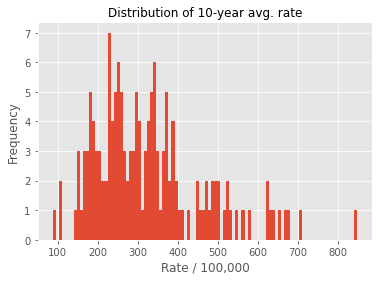

In [33]:
## Looking at how the dependent variable (10_year_avg_rate) is distributed 
## The 10_year_avg_rate doesn't look normally distributed
## The 10_year_avg_rate is positively skewed
## A log transformation looks necessary 

d1['10_year_avg_rate'].plot.hist(bins=100)
plt.title('Distribution of 10-year avg. rate', fontsize=12)
plt.xlabel('Rate / 100,000')

In [34]:
## Natural log transformation of the dependent variable 10_year_avg_rate

d1['log_10_year_avg_rate'] = np.log(d1['10_year_avg_rate'])

Text(0.5, 0, 'ln(Rate / 100,000)')

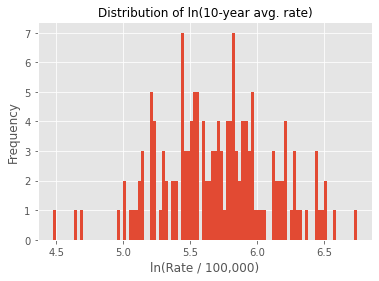

In [35]:
## Plotting natural log transformation of 10_year_avg_rate

d1['log_10_year_avg_rate'].plot.hist(bins=100)
plt.title('Distribution of ln(10-year avg. rate)', fontsize=12)
plt.xlabel('ln(Rate / 100,000)')

Now that I have looked at the distribution of the dependent variable, I am going to plot the proposed independent variable against the log-10 year average obesity rates to identify whether there are signs of a linear relationship.

I will be using the 'funding_pc_10_yr' average as the independent variable.

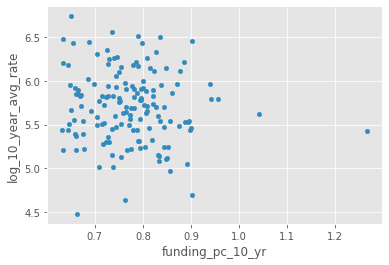

In [36]:
## Plotting log_10_year_avg_rate against the per capita funding 10 year average
## Looks like the relationship is non-linear

ax1 = d1.plot.scatter(x= 'funding_pc_10_yr',
                      y= 'log_10_year_avg_rate')

Text(0, 0.5, 'ln(10 year avg. rate')

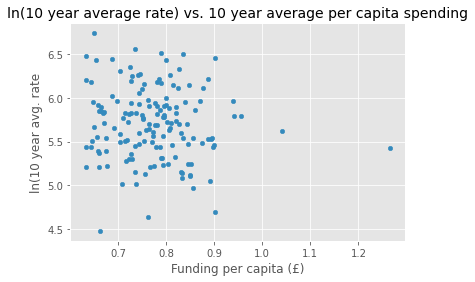

In [37]:
## Replotting the dependent vs independent variable with labels
ax2 = d1.plot.scatter(x= 'funding_pc_10_yr',
                      y= 'log_10_year_avg_rate')
plt.title('ln(10 year average rate) vs. 10 year average per capita spending', fontsize=14)
plt.xlabel('Funding per capita (£)')
plt.ylabel('ln(10 year avg. rate')

In [38]:
## Getting the pearson's correlation coefficient for the variable
## funding per capita 10-year average pearsons cc
## The correlation is almost non-existent

sps.pearsonr(d1['log_10_year_avg_rate'], d1['funding_pc_10_yr'])

(-0.09351651479144912, 0.2534100885463343)

It looks like there is no association between the 10 year average per capita spending and the 10 year average rates of childhood obesity despite the dependent variable being logged. 

#### Hypothesis test

I will now conduct the hypothesis test to double check my pre-regression analysis and see if it supports my findings.

I'll be going back to the 2 variables I created earlier:

**- west_midlands**

**- rest_of_england**

From these I will be taking a sample of equal sizes to compare.

Let's get some information about them again:

In [39]:
## Looking at the info about the west midlands
## n=14

west_midlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 6 to 150
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   region                14 non-null     category
 1   rate_2008             14 non-null     float64 
 2   rate_2013             14 non-null     float64 
 3   rate_2018             14 non-null     float64 
 4   10_year_avg_rate      14 non-null     float64 
 5   funding_pc_2008       14 non-null     float64 
 6   funding_pc_2013       14 non-null     float64 
 7   funding_pc_2018       14 non-null     float64 
 8   funding_pc_10_yr      14 non-null     float64 
 9   clean_air_pc_2008     14 non-null     float64 
 10  clean_air_pc_2013     14 non-null     float64 
 11  clean_air_pc_2018     14 non-null     float64 
 12  clean_air_pc_10_yr    14 non-null     float64 
 13  clean_env_pc_2008     14 non-null     float64 
 14  clean_env_pc_2013     14 non-null     float64 
 15  clean_e

I'm going to rename the rest_of_england variable to make it easier to refer to in the report:

In [40]:
no_west_midlands = rest_of_england

In [41]:
no_west_midlands.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 151
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   region                137 non-null    category
 1   rate_2008             137 non-null    float64 
 2   rate_2013             137 non-null    float64 
 3   rate_2018             137 non-null    float64 
 4   10_year_avg_rate      137 non-null    float64 
 5   funding_pc_2008       137 non-null    float64 
 6   funding_pc_2013       137 non-null    float64 
 7   funding_pc_2018       137 non-null    float64 
 8   funding_pc_10_yr      137 non-null    float64 
 9   clean_air_pc_2008     137 non-null    float64 
 10  clean_air_pc_2013     137 non-null    float64 
 11  clean_air_pc_2018     137 non-null    float64 
 12  clean_air_pc_10_yr    137 non-null    float64 
 13  clean_env_pc_2008     137 non-null    float64 
 14  clean_env_pc_2013     137 non-null    float64 
 15  clean_

Now I'm going to get a sample from the 2 variables, each of the same size.

In [42]:
## Sample size of 10 will be used for each

west_midlands_sample = west_midlands.sample(10, random_state = 42)
west_midlands_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 130 to 107
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   region                10 non-null     category
 1   rate_2008             10 non-null     float64 
 2   rate_2013             10 non-null     float64 
 3   rate_2018             10 non-null     float64 
 4   10_year_avg_rate      10 non-null     float64 
 5   funding_pc_2008       10 non-null     float64 
 6   funding_pc_2013       10 non-null     float64 
 7   funding_pc_2018       10 non-null     float64 
 8   funding_pc_10_yr      10 non-null     float64 
 9   clean_air_pc_2008     10 non-null     float64 
 10  clean_air_pc_2013     10 non-null     float64 
 11  clean_air_pc_2018     10 non-null     float64 
 12  clean_air_pc_10_yr    10 non-null     float64 
 13  clean_env_pc_2008     10 non-null     float64 
 14  clean_env_pc_2013     10 non-null     float64 
 15  clean

In [43]:
## Getting sample size from no west midlands

no_west_midlands_sample = no_west_midlands.sample(10, random_state=43)
no_west_midlands_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 138 to 86
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   region                10 non-null     category
 1   rate_2008             10 non-null     float64 
 2   rate_2013             10 non-null     float64 
 3   rate_2018             10 non-null     float64 
 4   10_year_avg_rate      10 non-null     float64 
 5   funding_pc_2008       10 non-null     float64 
 6   funding_pc_2013       10 non-null     float64 
 7   funding_pc_2018       10 non-null     float64 
 8   funding_pc_10_yr      10 non-null     float64 
 9   clean_air_pc_2008     10 non-null     float64 
 10  clean_air_pc_2013     10 non-null     float64 
 11  clean_air_pc_2018     10 non-null     float64 
 12  clean_air_pc_10_yr    10 non-null     float64 
 13  clean_env_pc_2008     10 non-null     float64 
 14  clean_env_pc_2013     10 non-null     float64 
 15  clean_

We need to get several statistics from the 2 samples so we will use the describe function to get them. We need to get:

- sample size
- mean per capita spending (10 year average)
- standard deviation of per capita spending
- variance of per capita spending

Starting with the West_Midlands_sample:

In [44]:
## Lets start with the west midlands

west_midlands_sample.describe()

,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,clean_air_pc_2013,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,...,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,450.335,466.854,480.905,466.032,0.807,0.763,0.734,0.768,0.125,0.118,...,0.161,0.168,0.137,0.129,0.125,0.130,0.064,0.060,0.058,0.061
std,94.779,99.146,97.759,96.778,0.054,0.051,0.055,0.051,0.060,0.056,...,0.058,0.060,0.043,0.041,0.040,0.041,0.025,0.024,0.023,0.024
min,295.156,304.286,326.393,308.612,0.676,0.644,0.616,0.645,0.054,0.051,...,0.107,0.114,0.065,0.063,0.059,0.062,0.038,0.035,0.031,0.035
25%,397.470,400.672,419.102,406.954,0.794,0.748,0.736,0.755,0.078,0.074,...,0.117,0.122,0.108,0.100,0.098,0.102,0.049,0.047,0.046,0.047
50%,479.303,493.152,487.753,484.324,0.825,0.775,0.755,0.783,0.122,0.115,...,0.144,0.148,0.143,0.135,0.132,0.139,0.052,0.049,0.049,0.050
75%,496.954,516.754,534.552,521.020,0.840,0.794,0.764,0.797,0.166,0.157,...,0.196,0.204,0.163,0.154,0.146,0.152,0.072,0.069,0.065,0.068
max,601.475,623.123,654.454,626.351,0.860,0.827,0.787,0.820,0.229,0.211,...,0.274,0.287,0.209,0.198,0.189,0.199,0.117,0.111,0.106,0.111


The results:

- Sample size = 10
- Mean per capita spending (10 year average) = 0.768
- SD of per capita spending (10 year average) =  0.051
- Variance of per capita spending (10 year average) = 0.051 x 0.051 = 0.0026009999999999996

In [45]:
#Calculating variance for West Midlands sample

v_1 = 0.051*0.051
print(v_1)

0.0026009999999999996


Now we'll get the same for the No West Midlands sample

In [46]:
## Get stats for no west midlands

no_west_midlands_sample.describe()

,rate_2008,rate_2013,rate_2018,10_year_avg_rate,funding_pc_2008,funding_pc_2013,funding_pc_2018,funding_pc_10_yr,clean_air_pc_2008,clean_air_pc_2013,...,school_pc_2018,school_pc_10_yr,media_pc_2008,media_pc_2013,media_pc_2018,media_pc_10_yr,counselling_pc_2008,counselling_pc_2013,counselling_pc_2018,counselling_pc_10_yr
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,...,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,292.170,282.190,309.968,294.776,0.812,0.794,0.777,0.794,0.123,0.122,...,0.275,0.282,0.080,0.079,0.078,0.079,0.057,0.056,0.055,0.056
std,180.505,201.400,185.121,187.304,0.079,0.082,0.073,0.070,0.074,0.074,...,0.198,0.207,0.045,0.046,0.046,0.045,0.031,0.031,0.030,0.031
min,102.331,41.929,110.598,108.834,0.700,0.688,0.665,0.704,0.000,0.000,...,0.113,0.119,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,185.981,176.480,191.515,178.958,0.762,0.729,0.734,0.738,0.065,0.061,...,0.186,0.195,0.051,0.049,0.045,0.048,0.042,0.039,0.038,0.039
50%,235.293,214.615,245.514,223.429,0.780,0.784,0.763,0.777,0.138,0.132,...,0.230,0.233,0.084,0.083,0.085,0.084,0.063,0.062,0.058,0.061
75%,342.540,352.226,366.021,353.596,0.885,0.846,0.841,0.849,0.180,0.186,...,0.267,0.263,0.110,0.104,0.097,0.103,0.069,0.074,0.077,0.073
max,702.499,718.039,711.386,710.641,0.925,0.931,0.879,0.901,0.213,0.205,...,0.820,0.856,0.157,0.152,0.147,0.152,0.105,0.106,0.096,0.102


The results:

- Sample size = 10
- Mean per capita spending (10 year average) = 0.794
- SD of per capita spending (10 year average) =  0.070
- Variance of per capita spending (10 year average) = 0.070 x 0.070 = 0.004900000000000001

In [47]:
## Calculating variance of no west midlands

v_2 = 0.070*0.070
print(v_2)

0.004900000000000001


Now that we have the stats we can do the pooled t-test to test our hypothesis that the West Midlands have a per capita spending mean < the rest of england (denoted as the no west midlands variable).

We will calculate the pooled standard deviation and then do the T-test:

In [48]:
## Calculating the pooled standard deviation

n_1 = 10
xbar_1 = 0.768
s_1 = 0.051*0.051
n_2 = 10
xbar_2 = 0.794
s_2 = 0.070*0.070
s_pooled = math.sqrt(((n_1-1)*s_1+(n_2-1)*s_2)/(n_1+n_2-2))
print(s_pooled)

0.0612413259164104


In [49]:
## Calculating the t-test

tt =(xbar_1-xbar_2)/(s_pooled*math.sqrt(1/n_1+1/n_2))
print(tt)

-0.9493224802864013


In [50]:
## Getting the difference in means

obs = xbar_1-xbar_2
print(obs)

-0.026000000000000023


In [51]:
## Getting the standard error of means (SEM)

SEM = s_pooled / (math.sqrt(10))
print(SEM)

0.01936620768245554


In [52]:
## Getting the p-value
## Need the degrees of freedom (10+10 -2)

df = 2*10-2
print(df)

18


In [53]:
## Getting the p-value 

p = 1 - sps.t.cdf(tt, df=df)

print("t = " + str(tt))
print("p = " + str(p))

t = -0.9493224802864013
p = 0.8224852356420367


As we can see from the results, out p-value is > 0.05 this means that we cannot reject the null hypothesis.

This is an alternative way to getting the t-test but it doesnt accomodate for pooled sd so we wont use it but this is how it looks

In [54]:
## Alternative way to doing the t test
## But this isnt using the pooled sd so we wont use it

x1_values = west_midlands_sample['funding_pc_10_yr']
x2_values = no_west_midlands_sample['funding_pc_10_yr']

In [55]:
# These lines perform the comparison of means t-test:
tval, pval_mct = sps.ttest_ind(x1_values,x2_values,equal_var=True)
print("The mean comparison t-test p-value =", pval_mct)
print("The mean comparison t-statistic",tval)

The mean comparison t-test p-value = 0.3540295313156252
The mean comparison t-statistic -0.9513458266314174
